<a href="https://colab.research.google.com/github/AJ17ADITHYAN/CLassification/blob/master/ctkidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import imghdr
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
data_dir = "/content/drive/MyDrive/Medical images/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
os.listdir(data_dir)

['Stone', 'Cyst', 'Normal', 'Tumor']

In [4]:
image_ext = ['jpeg','jpg','png','bmp']

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        try:

            image_path = os.listdir(os.path.join(data_dir,image_class,image))
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                os.remove(image_path)
        except Exception as e:
            print("no remove")



Streaming output truncated to the last 5000 lines.
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove
no remove

In [6]:
img = cv2.imread(os.path.join("/content/drive/MyDrive/Medical images/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",'Cyst','Cyst- (1018).jpg'))
img.shape

(700, 865, 3)

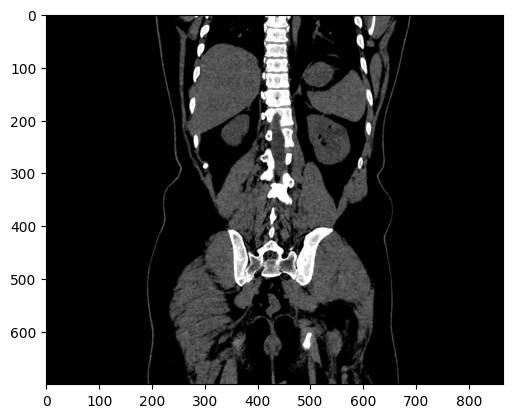

In [7]:
plt.imshow(img)

In [8]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12446 files belonging to 4 classes.
Using 9957 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12446 files belonging to 4 classes.
Using 2489 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['Cyst', 'Normal', 'Stone', 'Tumor']


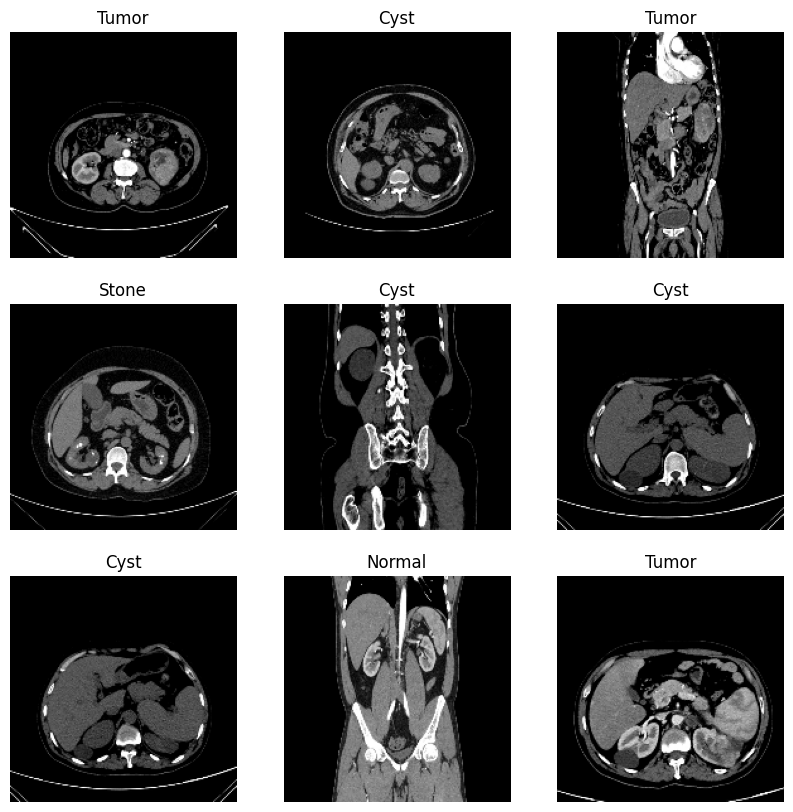

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 75/312 [======>.......................] - ETA: 18:44 - loss: 0.6847 - accuracy: 0.7283

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal',label = 'loss')
plt.plot(history.history['val_loss'], color='orange',label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal',label = 'accuracy')
plt.plot(history.history['val_accuracy'], color='orange',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(val_ds, steps=50)
print('Test accuracy:', test_acc)

In [ ]:
img = cv2.imread(/content/drive/MyDrive/Medical images/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1013).jpg)
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (180,180))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

In [ ]:
value = model.predict(np.expand_dims(resize/255 , 0))

In [ ]:
value

In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(value)], 100 * np.max(value))
)